<a href="https://colab.research.google.com/github/sudarshan-s-harithas/Youtube-Spam-Comment-Detector/blob/master/Decision%09trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section, we will be using decision trees and student performance data to predict whether a child will do well in school.We'll	use	the	student	performance dataset,	which	is	available	on	the	UC	Irvine	machine	learning	repository	at	**https: //archive.ics.uci.edu/ml/datasets/student+performance**.	Our	final	goal	is	to	predict whether	the	student	has	passed	or	failed.	The	dataset	contains	the	data	of	about 649	students,	with	and	30	attributes	for	each	student.	

In [0]:
import pandas as pd   ## importing the pandas library 

In [0]:
## Uploading data from the local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "student-por.csv" '.format(
      name=fn, length=len(uploaded[fn])))

Saving student-por.csv to student-por (1).csv
User uploaded file "student-por.csv" 


In [0]:
## The CSV file is read

data = pd.read_csv('student-por.csv', sep=';')

## The G1,G2,G3 is added and if the sum is greater than 35 , 1 is assigned to pass variable eolse 0 is assigned to pass

data['pass'] = data.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)

print(data)

## The G1,G2,G3 coloumns are remeoved from the dataset
data = data.drop(['G1', 'G2', 'G3'], axis=1)




    school sex  age address famsize Pstatus  ...  health  absences  G1  G2  G3 pass
0       GP   F   18       U     GT3       A  ...       3         4   0  11  11    0
1       GP   F   17       U     GT3       T  ...       3         2   9  11  11    0
2       GP   F   15       U     LE3       T  ...       3         6  12  13  12    1
3       GP   F   15       U     GT3       T  ...       5         0  14  14  14    1
4       GP   F   16       U     GT3       T  ...       5         0  11  13  13    1
5       GP   M   16       U     LE3       T  ...       5         6  12  12  13    1
6       GP   M   16       U     LE3       T  ...       3         0  13  12  13    1
7       GP   F   17       U     GT3       A  ...       1         2  10  13  13    1
8       GP   M   15       U     LE3       A  ...       1         0  15  16  17    1
9       GP   M   15       U     GT3       T  ...       5         0  12  12  13    1
10      GP   F   15       U     GT3       T  ...       2         2  14  14  

In [0]:
print(data) ## The dataset is displayed below without G1,G2,G3

    school sex  age address famsize  ... Dalc  Walc  health absences pass
0       GP   F   18       U     GT3  ...    1     1       3        4    0
1       GP   F   17       U     GT3  ...    1     1       3        2    0
2       GP   F   15       U     LE3  ...    2     3       3        6    1
3       GP   F   15       U     GT3  ...    1     1       5        0    1
4       GP   F   16       U     GT3  ...    1     2       5        0    1
5       GP   M   16       U     LE3  ...    1     2       5        6    1
6       GP   M   16       U     LE3  ...    1     1       3        0    1
7       GP   F   17       U     GT3  ...    1     1       1        2    1
8       GP   M   15       U     LE3  ...    1     1       1        0    1
9       GP   M   15       U     GT3  ...    1     1       5        0    1
10      GP   F   15       U     GT3  ...    1     2       2        2    1
11      GP   F   15       U     GT3  ...    1     1       4        0    1
12      GP   M   15       U     LE3  .

In [0]:
## the get_dummies function is used to assign dummy values to the designed coloumns

data = pd.get_dummies(data, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])

print(data)

     age  Medu  Fedu  ...  internet_yes  romantic_no  romantic_yes
0     18     4     4  ...             0            1             0
1     17     1     1  ...             1            1             0
2     15     1     1  ...             1            1             0
3     15     4     2  ...             1            0             1
4     16     3     3  ...             0            1             0
5     16     4     3  ...             1            1             0
6     16     2     2  ...             1            1             0
7     17     4     4  ...             0            1             0
8     15     3     2  ...             1            1             0
9     15     3     4  ...             1            1             0
10    15     4     4  ...             1            1             0
11    15     2     1  ...             1            1             0
12    15     4     4  ...             1            1             0
13    15     4     3  ...             1            1          

In [0]:
d= data
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]  ## 500 items trainning set
d_test = d[500:]  # there are 149 itmes testing set 

print(d_test)

     age  Medu  Fedu  ...  internet_yes  romantic_no  romantic_yes
174   17     2     1  ...             1            0             1
288   18     2     1  ...             1            0             1
588   17     4     1  ...             0            0             1
46    16     3     3  ...             1            1             0
151   16     4     4  ...             1            1             0
231   18     3     3  ...             1            1             0
430   16     1     2  ...             1            1             0
54    15     3     3  ...             1            1             0
262   17     1     4  ...             1            1             0
206   17     1     2  ...             1            1             0
489   18     1     1  ...             1            1             0
173   16     1     2  ...             1            1             0
561   18     1     1  ...             0            1             0
72    15     1     1  ...             1            0          

In [0]:
d_train_att = d_train.drop(['pass'], axis=1)  
d_train_pass = d_train['pass']  ## only the pass coloumn is stored in d_train_pass 

print(d_train_att)
print(d_train_pass)

     age  Medu  Fedu  ...  internet_yes  romantic_no  romantic_yes
402   17     4     3  ...             1            0             1
446   15     3     3  ...             1            1             0
564   16     3     2  ...             1            1             0
451   16     1     2  ...             0            1             0
182   16     2     2  ...             1            1             0
67    16     3     1  ...             1            1             0
13    15     4     3  ...             1            1             0
635   17     3     1  ...             1            1             0
40    16     2     2  ...             1            0             1
308   18     4     4  ...             1            1             0
362   18     4     4  ...             1            1             0
277   17     1     1  ...             0            1             0
433   15     4     4  ...             1            0             1
525   17     4     4  ...             1            1          

In [0]:
d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

In [0]:
d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

import numpy as np

pass_percentage = (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass))
print(pass_percentage)  ## determing the number of people have passsed

(328, 649, 50.53929121725732)


In [0]:
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)  ## There can be a maximum of 5 levels in the decession tree
t = t.fit(d_train_att, d_train_pass)  ## trainning the model 

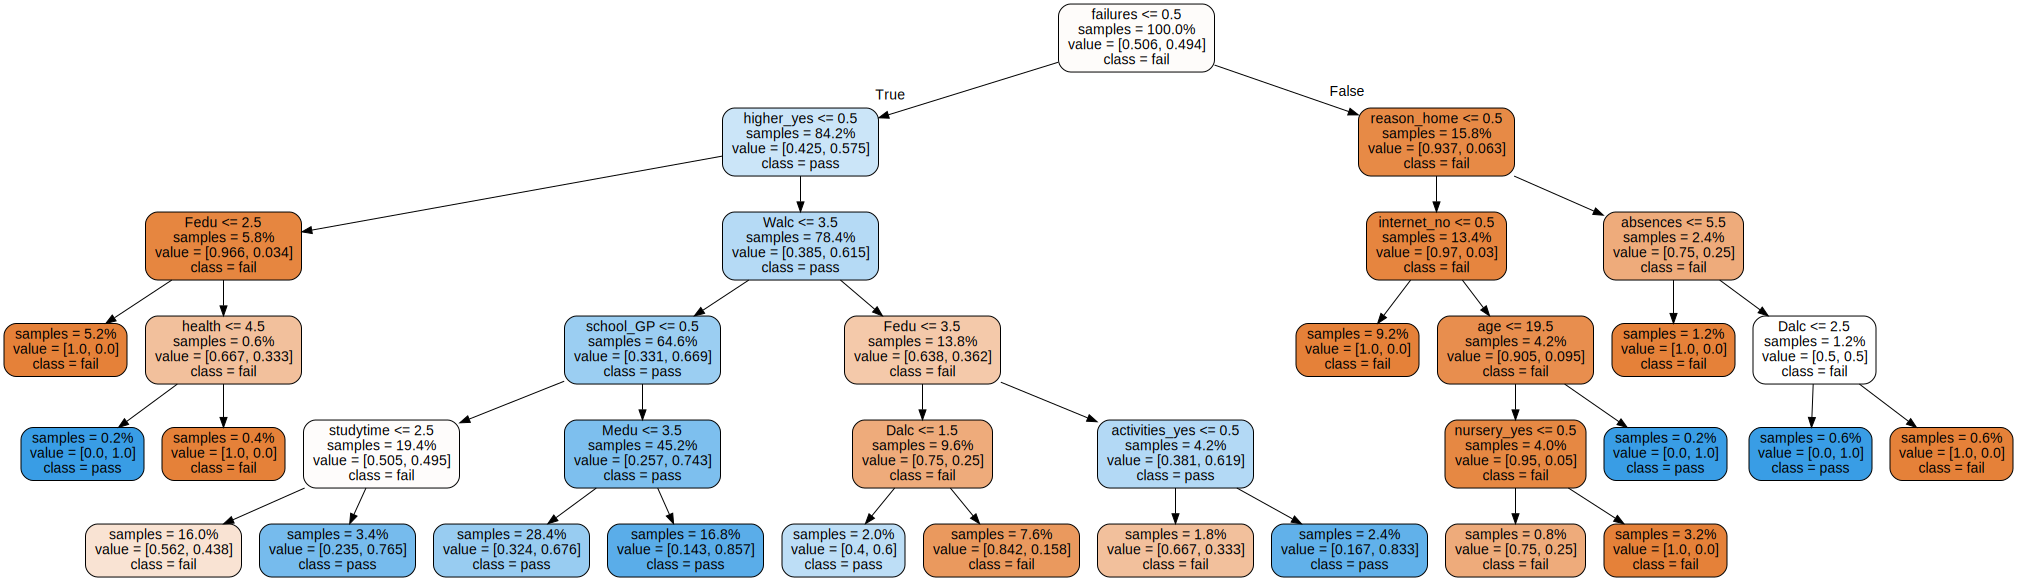

In [0]:
## Graphical representation of the tree

import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [0]:
t.score(d_test_att, d_test_pass)  

0.6778523489932886

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.09)
